## Image Processing: 101

Arithmetic Operations
Bitwise Operations


In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from IPython.display import display
# https://likegeeks.com/python-image-processing/
# https://www.geeksforgeeks.org/opencv-python-tutorial/

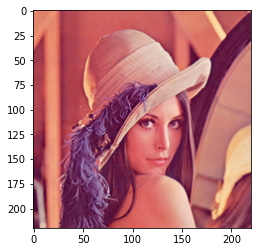

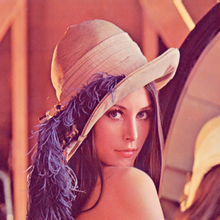

In [12]:
img = cv2.imread("220px-Lenna_(test_image).png")
# arg1 : full path of the image
# arg2 [opt] : cv2.IMREAD_COLOR / 1 / cv2.IMREAD_UNCHANGED / -1 / cv2.IMREAD_GRAYSCALE / 0
# colour image excluding alpha channel [default] / including alpha channel / grayscale mode 

# OpenCV uses BGR image format. So, when we read an image using cv2.imread() it interprets in BGR format by default.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# displaying image
# Matplotlib
plt.imshow(img_rgb)
plt.show()

# IPython
display(Image.fromarray(img_rgb))

# OpenCV
cv2.imshow('Original Image', img) #cv2.imshow(window name, image)
cv2.waitKey(0) # keyboard binding function take time in milliseconds as a delay for the window to close
cv2.destroyAllWindows() # destroy all created GUI window

In [35]:
height, width, channels = img.shape
height, width, channels

(220, 220, 3)

In [14]:
cv2.imwrite('Lenna.png', img) # save image
# cv2.imwrite(filename, image)

True

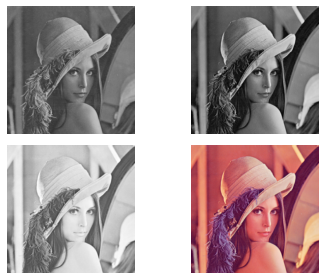

In [18]:
image = cv2.imread('Lenna.png') 

bgr = cv2.split(image) 
bgr.append(image)
# Corresponding channels are seperated

fig=plt.figure()
columns = 2
rows = 2

for i in range(1, columns*rows +1):
    
    img = bgr[i-1]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.imshow(img)
fig.tight_layout() 
plt.show()


## Arithmetic Operations

In [ ]:
# cv2.addWeighted(image1, 0.5, image2, 0.4, 0)
# cv2.add(img1, img2) # adds up image pixels in the two images.
# cv2.subtract(src1, src2)


## Bitwise Operations on Binary Images

In [ ]:
# cv2.bitwise_and(source1, source2, destination, mask)

## Rotate an Image

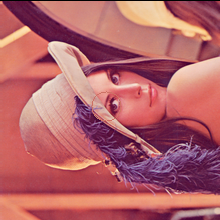

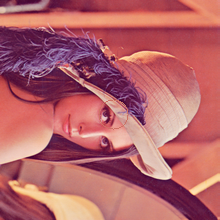

In [40]:
# cv2.getRotationMatrix2D(center, angle, scale) 
# https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html
rotationMatrix = cv2.getRotationMatrix2D((width//2, height//2), 90, 1)
# warp_rotate_dst = cv.warpAffine(src, M, (dsize))
rotatedImage = cv2.warpAffine(img, rotationMatrix, (width, height))
display(Image.fromarray(rotatedImage))

# Using cv2.rotate() method
# Using cv2.ROTATE_90_CLOCKWISE rotate by 90 degrees clockwise
rotated_image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
display(Image.fromarray(rotated_image))

## Crop an Image 

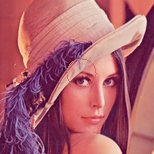

In [41]:
startRow = int(height*.15) 
startCol = int(width*.15) 
endRow = int(height*.85) 
endCol = int(width*.85)

croppedImage = img[startRow:endRow, startCol:endCol]

display(Image.fromarray(croppedImage))

## Resize an Image

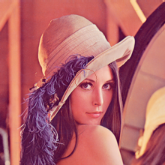

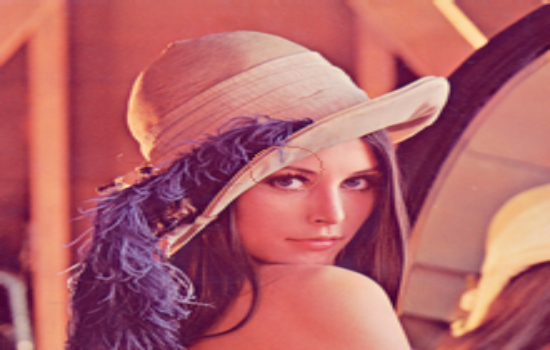

In [43]:
newImg = cv2.resize(img, (0,0), fx=0.75, fy=0.75) 
display(Image.fromarray(newImg))

newImg = cv2.resize(img, (550, 350)) 
display(Image.fromarray(newImg))

## Adjust Image Contrast

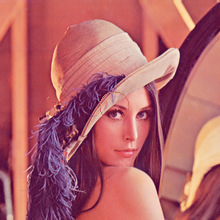

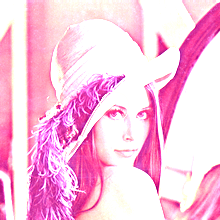

In [44]:
# new_img = a * original_img + b
# a : contrast of the image. If a > 1 : higher contrast. If 0 <= a < 1 : lower contrast. If a = 1 : no contrast.
# b vary from -127 to +127.
# cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)
# blend two images, the first source image (source_img1) with a weight of alpha1 and second source image (source_img2).
import numpy as np

contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)
display(Image.fromarray(img))
display(Image.fromarray(contrast_img))

## Make an image blurry

### Gaussian Blur

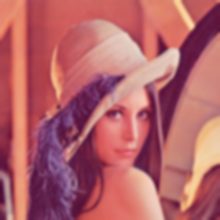

In [20]:
blur_image = cv2.GaussianBlur(img, (7,7), 0)
display(Image.fromarray(blur_image))

### Median Blur

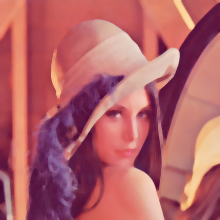

In [21]:
blur_image = cv2.medianBlur(img,5)
display(Image.fromarray(blur_image))

## Detect Edges

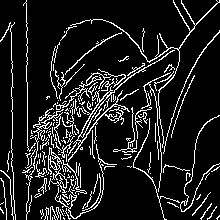

In [22]:
# cv2.Canny(image, minVal, maxVal)
# minimum and maximum intensity gradient values
edge_img = cv2.Canny(img,100,200)
display(Image.fromarray(edge_img))

## Convert image to grayscale (Black & White)

Color to Grayscale Conversion 
- average method 

R / 3 + G / 3 + B / 3
- weighted method / luminosity method
0.299R + 0.587G + 0.114B

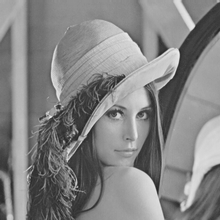

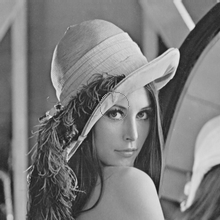

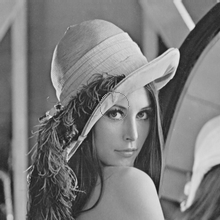

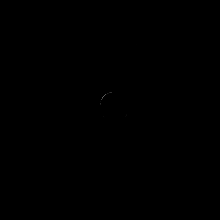

In [60]:
# imread grayscale result may differ to the output of cvtColor 

gray_img_1 = cv2.imread("220px-Lenna_(test_image).png", cv2.IMREAD_GRAYSCALE) # codec's internal grayscale conversion
display(Image.fromarray(gray_img_1))

gray_img_2 = cv2.imread("220px-Lenna_(test_image).png", cv2.IMREAD_COLOR)
gray_img_2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display(Image.fromarray(gray_img_2))

gray_img_3 = cv2.imread("220px-Lenna_(test_image).png", cv2.IMREAD_UNCHANGED)
gray_img_3 = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
display(Image.fromarray(gray_img_3))

display(Image.fromarray(cv2.subtract(gray_img_3, gray_img_1)))

## Centroid (Center of blob) detection

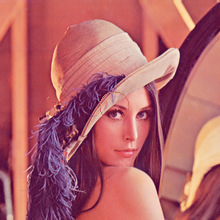

In [32]:
moment = cv2.moments(gray_img)
X = int(moment ["m10"] / moment["m00"])
Y = int(moment ["m01"] / moment["m00"])
cv2.circle(img, (X, Y), 15, (205, 114, 101), 1)
display(Image.fromarray(img))

## Apply a mask for a colored image

In [19]:
img1 = cv2.imread('220px-Lenna_(test_image).png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 3)
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=50, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

In [20]:
masking=np.full((img1.shape[0], img1.shape[1]),0,dtype=np.uint8)

for j in circles[0, :]:
    cv2.circle(masking, (j[0], j[1]), j[2], (255, 255, 255), -1)
    
final_img = cv2.bitwise_or(img1, img1, mask=masking)

In [21]:
cv2.imshow("Image", final_img)
cv2.waitKey(0)

-1